# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Background:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated form the literature and then will be tested by local Bruneian CVD risk data and then will be continuously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Installing Packages

In [2]:
%pip install pandas
%pip install mlxtend
%pip install seaborn
%pip install openpyxl
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 266.3/266.3 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 2.1 MB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 522.1 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 749.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00
     ------------------------------------ 895.7/895.7 kB 832.9 kB/s eta 0:00:00
     ----------------

## Importing Libraries

In [2]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
import mlxtend
from mlxtend.classifier import StackingCVClassifier

## Reading Different Data

## Office-based datasets

#### Description 
- These datasets are based on WHO/ISH risk prediction chart for use where measurement of cholesterol level is not possible (office-based). This chart indicates total 10-year risk of a fatal or non-fatal cardiovascular event (myocardial infarction or stroke), according to age, sex, blood pressure, presence or absence of diabetes, and smoking status.

#### list
1. Kaggle dataset
2. Indonesian dataset
3. Indian dataset

### Kaggle dataset 

In [3]:
# Reading and converting the data into a pandas dataframe
Kaggle_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Office based Datasets/Kaggle dataset/cardio_train.csv",
    sep=";")

# Informtion about the raw dataset
Kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Background
The first dataset Collected from Kaggle (**cardio_train.csv**)  contains 70000 records with 11 independent features which is available so far for research purposes. These data were collected at the moment of medical examination and information given by the patient. The features can be listed as follows :

| Column | Description |
| ------ | ----------- |
| age | Age (int) in days|
| height | Height (int) |
| weight | Weight (float) |
| gender | Gender (categorical code )|
| ap_hi | Systolic blood pressure (int) |
| ap_lo | Diastolic blood pressure (int) |
| cholesterol | Cholesterol (1:normal, 2: above normal, 3: well above normal) |
| gluc | Glucose (1:normal, 2: above normal, 3: well above normal) |
| smoke | Smoking (binary) |
| alco | Alcohol intake (binary) |
| active | Physical activity (binary) |
| cardio | Presence or absence of cardiovascular disease (binary) |

##### Citaion:
> `Rajib Kumar Halder, November 10, 2020, "Cardiovascular Disease Dataset", IEEE Dataport, doi: https://dx.doi.org/10.21227/7qm5-dz13.`


In [4]:
# Checking Missing values in the dataset

num_Missing_values = Kaggle_df.isna().sum().sum()
print('Missing values: ', num_Missing_values, '\n')

# Checking dupicated values in the dataset
duplicates = Kaggle_df.duplicated().sum()
if duplicates:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |(float) Systolic blood pressure  |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| CVD risk |**Target label (binary)** 1: Presence of CVD,  0: absence of CVD|

In [5]:
# define variable columns based on office-based CVD screening strategy
Kaggle_df = Kaggle_df.loc[:,['age','gender','ap_hi','gluc','smoke','cardio']]
Kaggle_df.head()

,age,gender,ap_hi,gluc,smoke,cardio
0,18393,2,110,1,0,0
1,20228,1,140,1,0,1
2,18857,1,130,1,0,1
3,17623,2,150,1,0,1
4,17474,1,100,1,0,0


In [6]:
# Uniforming the columns names
Kaggle_df.rename({'age': 'Age', 
                              'gender': 'Gender',
                              'ap_hi': 'SysBP',
                              'gluc' : 'Diabetes',
                              'smoke' : 'Smoking',
                              'cardio' : 'CVD risk'}, axis = 1, inplace = True)
Kaggle_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,18393,2,110,1,0,0
1,20228,1,140,1,0,1
2,18857,1,130,1,0,1
3,17623,2,150,1,0,1
4,17474,1,100,1,0,0


In [7]:
Kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       70000 non-null  int64
 1   Gender    70000 non-null  int64
 2   SysBP     70000 non-null  int64
 3   Diabetes  70000 non-null  int64
 4   Smoking   70000 non-null  int64
 5   CVD risk  70000 non-null  int64
dtypes: int64(6)
memory usage: 3.2 MB


In [8]:
# Uniforming & Rounding the value of Age column
Kaggle_df['Age']=Kaggle_df['Age'].apply(lambda x:round(x/365,1))
Kaggle_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,50.4,2,110,1,0,0
1,55.4,1,140,1,0,1
2,51.7,1,130,1,0,1
3,48.3,2,150,1,0,1
4,47.9,1,100,1,0,0
5,60.0,1,120,2,0,0
6,60.6,1,130,1,0,0
7,61.9,2,130,3,0,1
8,48.4,1,110,1,0,0
9,54.3,1,110,1,0,0


In [9]:
# Correcting categories of Diabetes variables
Kaggle_df['Diabetes'].replace({1 : 0, 2 : 1, 3 : 1}, inplace = True)

Kaggle_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,50.4,2,110,0,0,0
1,55.4,1,140,0,0,1
2,51.7,1,130,0,0,1
3,48.3,2,150,0,0,1
4,47.9,1,100,0,0,0
5,60.0,1,120,1,0,0
6,60.6,1,130,0,0,0
7,61.9,2,130,1,0,1
8,48.4,1,110,0,0,0
9,54.3,1,110,0,0,0


In [10]:
# Defining the coorect types of the variables

Kaggle_df['Age'] = Kaggle_df['Age'].astype("float")
Kaggle_df['SysBP'] = Kaggle_df['SysBP'].astype("float")


Kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       70000 non-null  float64
 1   Gender    70000 non-null  int64  
 2   SysBP     70000 non-null  float64
 3   Diabetes  70000 non-null  int64  
 4   Smoking   70000 non-null  int64  
 5   CVD risk  70000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 3.2 MB


In [11]:
# Checking the brief statistical properities of the numerical variables in the dataset
numeric_features = ['Age', 'SysBP']
Kaggle_df[numeric_features].describe()

,Age,SysBP
count,70000.000000,70000.000000
mean,53.339486,128.817286
std,6.759534,154.011419
min,29.600000,-150.000000
25%,48.400000,120.000000
50%,54.000000,120.000000
75%,58.400000,140.000000
max,65.000000,16020.000000


#### Observations

- Age has normal range between 29.6 to 65 years.
- Systolic blood pressure "SysBP" cannot be negative or more than 280 mmHg.Therefore, min and max values are not realistic.

In [12]:
# outliers detection

outliers = len(Kaggle_df[(Kaggle_df["SysBP"]>=280) | (Kaggle_df["SysBP"] < 60)])

print(f'The total number of outliers is: {outliers} ')
print(f'Percent of data will be missing: {round(outliers/len(Kaggle_df)*100,1)}%')

The total number of outliers is: 228 
Percent of data will be missing: 0.3%


In [13]:
# outliers removal

Kaggle_df_filtered = Kaggle_df[ (Kaggle_df['SysBP'] < 280) & (Kaggle_df['SysBP'] >= 60) ]

Kaggle_df_filtered['SysBP'].describe()

count    69772.000000
mean       127.001820
std         17.096568
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: SysBP, dtype: float64

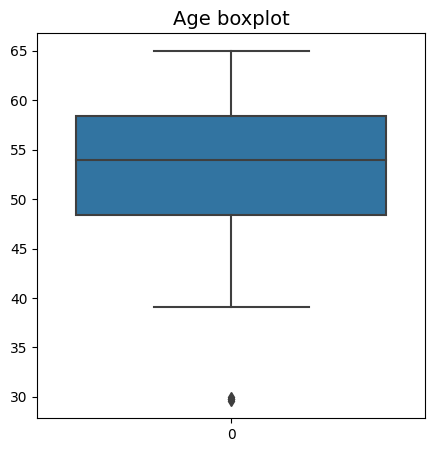

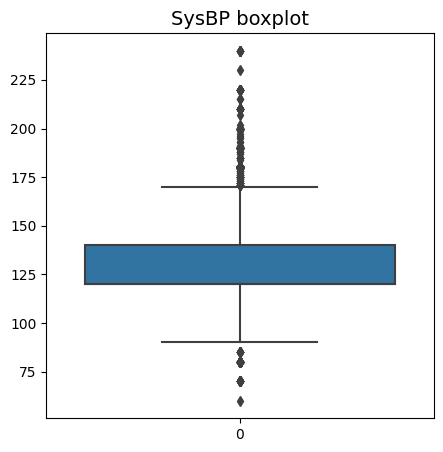

In [14]:
# Plotting the numerical variables in  the dataset
numeric_features = ['Age', 'SysBP']
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Kaggle_df_filtered[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

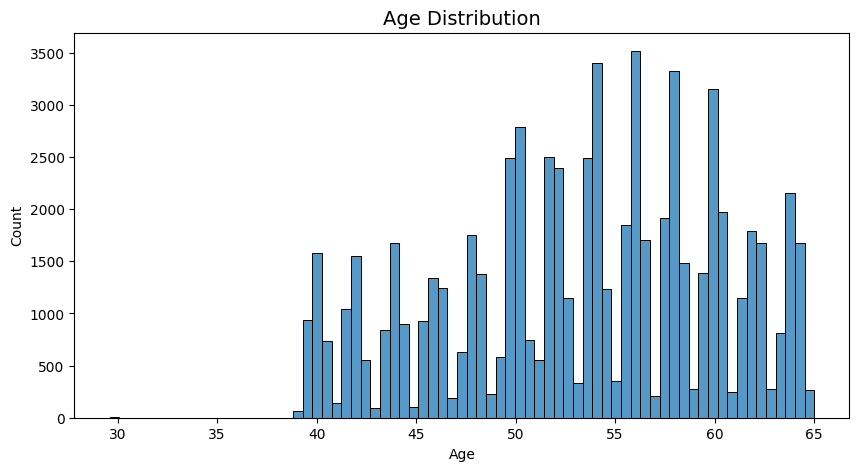

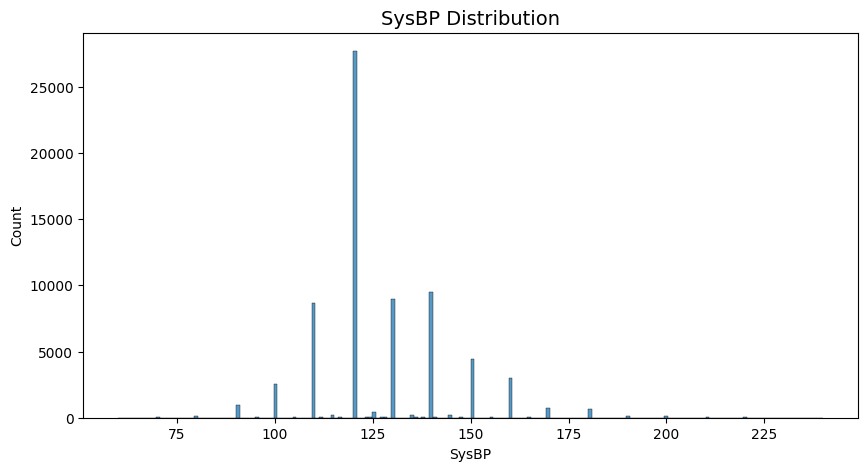

In [15]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Kaggle_df_filtered[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution and Systolic blood pressure "SysBP" distribution have uneven distribution.

In [16]:
# Checking the brief statistical properities of the categorical variables in the dataset

categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']
for feature in categorical_features:
    print(feature,':')
    print(Kaggle_df_filtered[feature].value_counts())
    print("-----------------")

Gender :
1    45380
2    24392
Name: Gender, dtype: int64
-----------------
Diabetes :
0    59279
1    10493
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    63612
1     6160
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    34912
1    34860
Name: CVD risk, dtype: int64
-----------------


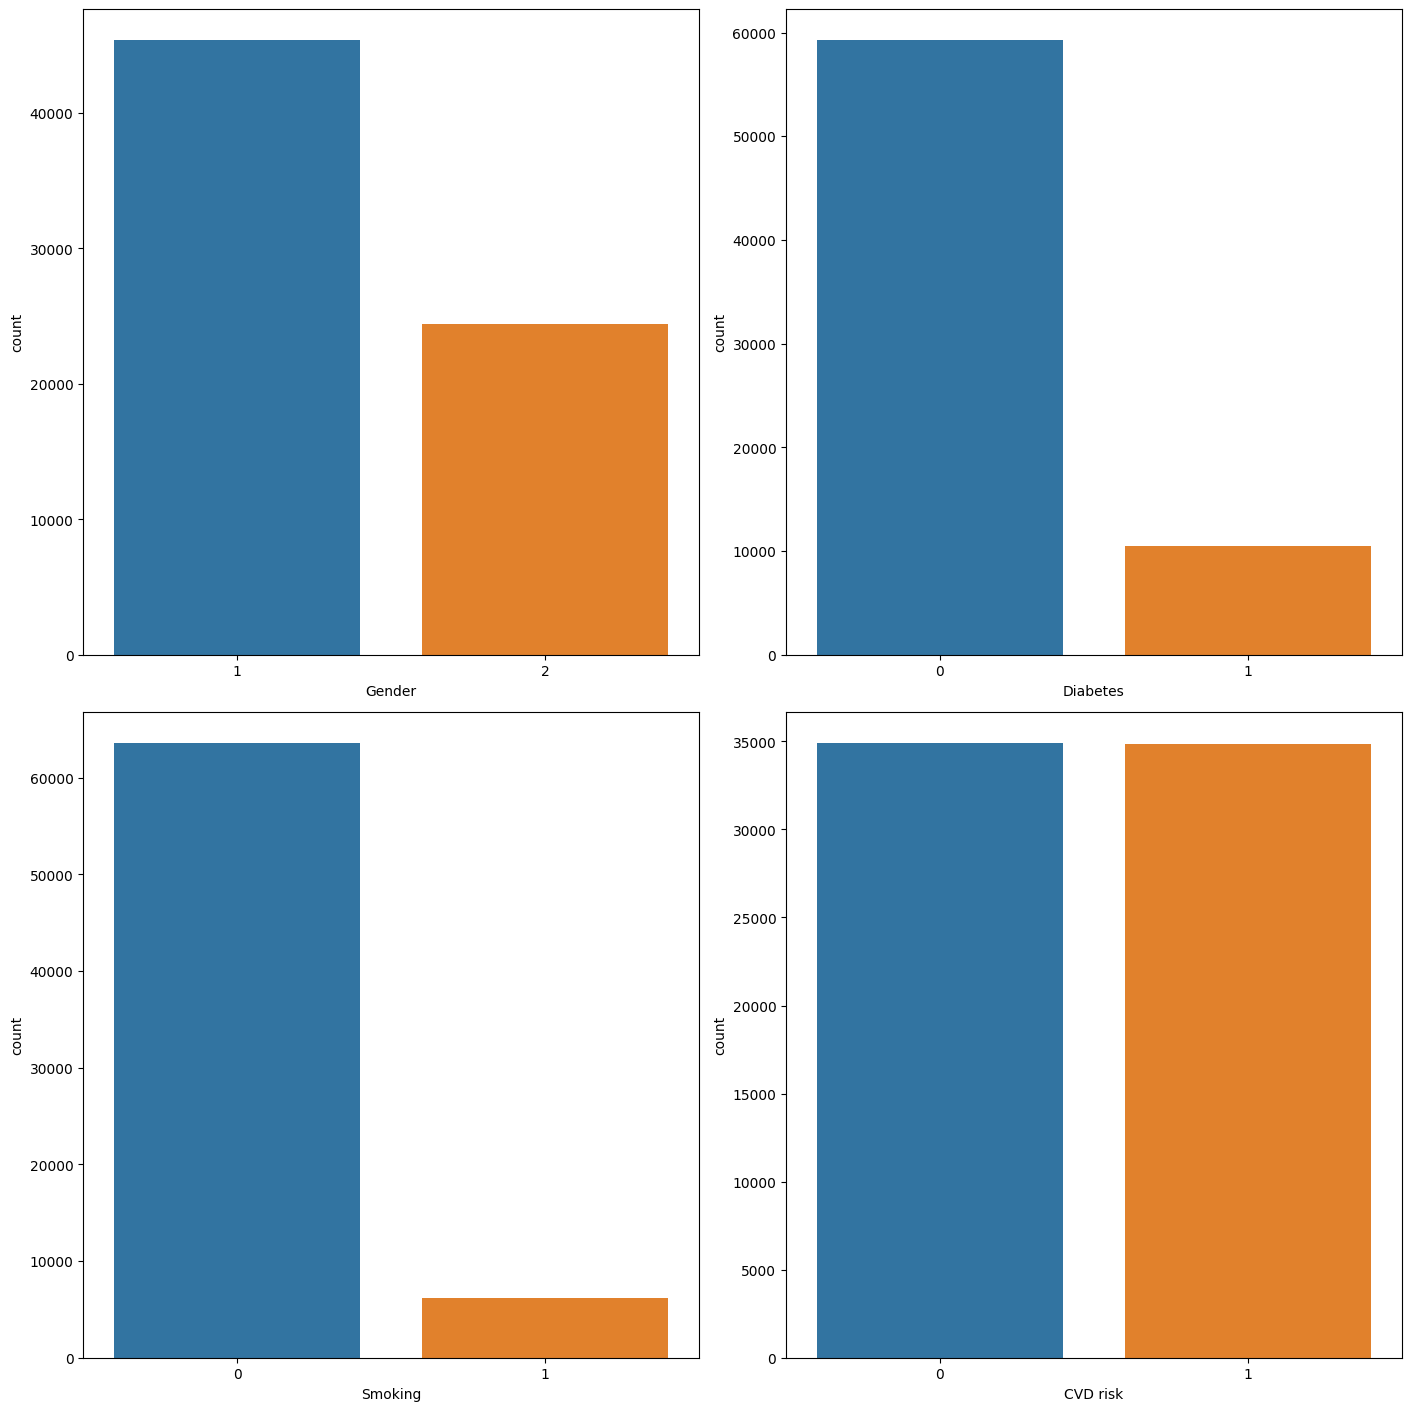

In [17]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Kaggle_df_filtered, ax=axs[row][pos])

Among the categorical features:
* `Smoking` and `Diabetes` are highly imbalanced.
* The target labl `CVD risk` is showing good class balance.

### Indonesian dataset 

In [18]:
# Reading and converting the data into a pandas dataframe
Indonesian_df = pd.read_excel(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Office based Datasets/Indonesian dataset/SH baseline dataset_dataverse.xlsx")

# Informtion about the raw dataset
Indonesian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22093 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      22093 non-null  int64  
 1   age             22093 non-null  int64  
 2   sex             22093 non-null  object 
 3   education       22080 non-null  object 
 4   marital_status  22030 non-null  object 
 5   occupation      22086 non-null  object 
 6   sbp_avg         22010 non-null  float64
 7   dbp_avg         22012 non-null  float64
 8   bg_mgdl         21986 non-null  float64
 9   bmi             21885 non-null  float64
 10  smoking         22093 non-null  object 
 11  village         22093 non-null  object 
 12  areas           22093 non-null  object 
 13  cvdrisk         22091 non-null  object 
 14  highrisk        22093 non-null  object 
 15  bplt            22093 non-null  object 
 16  lltt            22093 non-null  object 
 17  aptt            22093 non-null 

#### Background
This dataset includes the baseline information required for the cardiovascular disease risk factor prevalence study in the SMARThealth Extend project in Indonesia.

##### Citaion:
> `@data{DVN/WQHCIF_2019,
author = {Devarsetty, Praveen},
publisher = {Harvard Dataverse},
title = {{Replication data for the “Cardiovascular disease risk factor prevalence study in SMARThealth Extend project”}},
UNF = {UNF:6:PwU7Si8uc9HLgsfG4ZpDqw==},
year = {2019},
version = {DRAFT VERSION},
doi = {10.7910/DVN/WQHCIF},
url = {https://doi.org/10.7910/DVN/WQHCIF}
}.`

> `Maharani A, Sujarwoto, Praveen D,
Oceandy D, Tampubolon G, Patel A (2019)
Cardiovascular disease risk factor prevalence and
estimated 10-year cardiovascular risk scores in
Indonesia: The SMARThealth Extend study. PLoS
ONE 14(4): e0215219. https://doi.org/10.1371/
journal.pone.0215219`

In [19]:
# Checking Missing values in the dataset
num_Missing_values_Indo = Indonesian_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Indo, '\n')

# Checking dupicated values in the dataset
duplicates_Indo = Indonesian_df.duplicated().sum()
if duplicates_Indo:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Indo))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  564 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure**  |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [20]:
# define variable columns based on office-based CVD screening strategy

Indonesian_df = Indonesian_df.loc[:,['age','sex','sbp_avg','bg_mgdl','smoking','highrisk']]
Indonesian_df.head()

,age,sex,sbp_avg,bg_mgdl,smoking,highrisk
0,65,Female,140.5,156.0,nonsmoker,No
1,60,Male,156.0,113.0,smoker,Yes
2,87,Male,153.5,91.0,pastsmoker,Yes
3,82,Female,152.0,114.0,nonsmoker,Yes
4,55,Female,179.0,130.0,nonsmoker,Yes


In [21]:
# Uniforming the columns names
Indonesian_df.rename({'age': 'Age', 
                              'sex': 'Gender',
                              'sbp_avg': 'SysBP',
                              'bg_mgdl' : 'Diabetes',
                              'smoking' : 'Smoking',
                              'highrisk' : 'CVD risk'}, axis = 1, inplace = True)
Indonesian_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,65,Female,140.5,156.0,nonsmoker,No
1,60,Male,156.0,113.0,smoker,Yes
2,87,Male,153.5,91.0,pastsmoker,Yes
3,82,Female,152.0,114.0,nonsmoker,Yes
4,55,Female,179.0,130.0,nonsmoker,Yes
5,100,Male,191.0,168.0,pastsmoker,Yes
6,93,Female,143.5,102.0,nonsmoker,Yes
7,90,Female,161.0,141.0,nonsmoker,Yes
8,87,Male,149.0,77.0,pastsmoker,No
9,85,Male,122.0,99.0,pastsmoker,No


In [22]:
# Uniforming the categories of the categorial variables 

Indonesian_df['Gender'].replace({'Female': 1, 'Male': 2  }, inplace = True)
Indonesian_df['Smoking'].replace({'smoker': 1, 'nonsmoker':0, 'pastsmoker': 0  }, inplace = True)
Indonesian_df['CVD risk'].replace({'Yes': 1, 'No':0 }, inplace = True)
Indonesian_df['Diabetes'] = Indonesian_df['Diabetes'].apply(lambda x: '1' if x >= 126  else '0')

Indonesian_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,65,1,140.5,1,0,0
1,60,2,156.0,0,1,1
2,87,2,153.5,0,0,1
3,82,1,152.0,0,0,1
4,55,1,179.0,1,0,1
5,100,2,191.0,1,0,1
6,93,1,143.5,0,0,1
7,90,1,161.0,1,0,1
8,87,2,149.0,0,0,0
9,85,2,122.0,0,0,0


In [23]:
# Checking Missing values in the dataset

Indonesian_df.isna().sum()


Age          0
Gender       0
SysBP       83
Diabetes     0
Smoking      0
CVD risk     0
dtype: int64

In [24]:
# Checking the brief statistical properities of the numerical variables in the dataset
Indonesian_df.describe()

,Age,Gender,SysBP,Smoking,CVD risk
count,22093.000000,22093.000000,22010.000000,22093.000000,22093.000000
mean,54.916535,1.433667,140.390277,0.266148,0.292083
std,10.787480,0.495592,23.770916,0.441952,0.454731
min,40.000000,1.000000,75.500000,0.000000,0.000000
25%,46.000000,1.000000,123.000000,0.000000,0.000000
50%,53.000000,1.000000,136.000000,0.000000,0.000000
75%,61.000000,2.000000,154.000000,1.000000,1.000000
max,116.000000,2.000000,243.000000,1.000000,1.000000


In [25]:
# Filling the missing values of the systolic Blood pressure with the median the variable column
Indonesian_df['SysBP'].fillna((Indonesian_df['SysBP'].median()), inplace=True) # meadian is near to the mean

Indonesian_df.isna().sum()

Age         0
Gender      0
SysBP       0
Diabetes    0
Smoking     0
CVD risk    0
dtype: int64

In [26]:
# Defining the coorect types of the variables

Indonesian_df['Age'] = Indonesian_df['Age'].astype("float")

Indonesian_df['Diabetes'] = Indonesian_df['Diabetes'].astype("int64")


Indonesian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22093 entries, 0 to 22092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       22093 non-null  float64
 1   Gender    22093 non-null  int64  
 2   SysBP     22093 non-null  float64
 3   Diabetes  22093 non-null  int64  
 4   Smoking   22093 non-null  int64  
 5   CVD risk  22093 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.0 MB


In [27]:
# Checking the brief statistical properities of the numerical variables in the dataset
Indonesian_df[numeric_features].describe()

,Age,SysBP
count,22093.000000,22093.000000
mean,54.916535,140.373784
std,10.787480,23.727741
min,40.000000,75.500000
25%,46.000000,123.000000
50%,53.000000,136.000000
75%,61.000000,153.500000
max,116.000000,243.000000


#### Observations

- Age has normal range between 40 to 116 years.
- Also, Systolic blood pressure "SysBP" has normal range between 75.5 to 243 mmHg

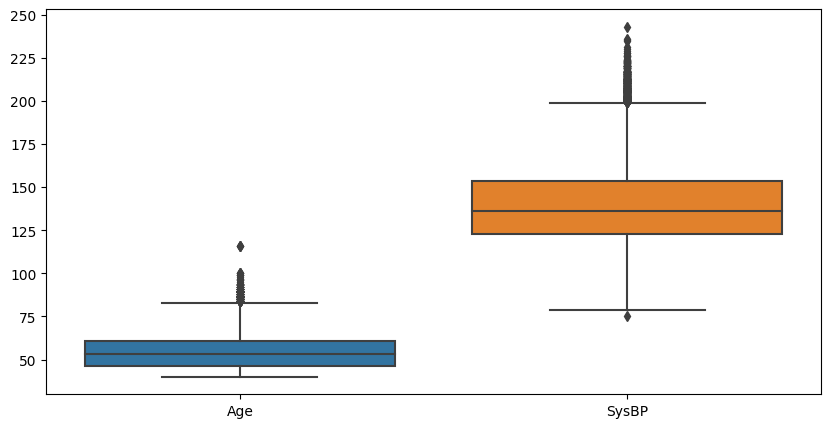

In [28]:
# Plotting the numerical variables in  the dataset

plt.figure(figsize=(10,5), facecolor='w')
sns.boxplot(data=Indonesian_df[numeric_features])
plt.show()

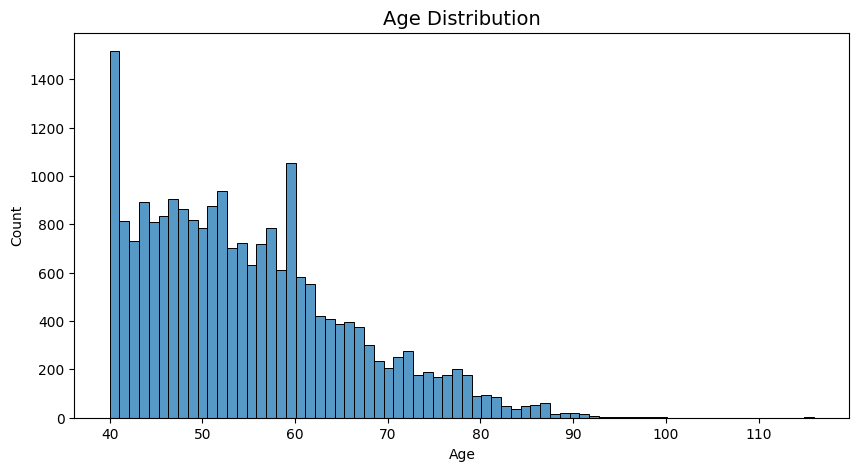

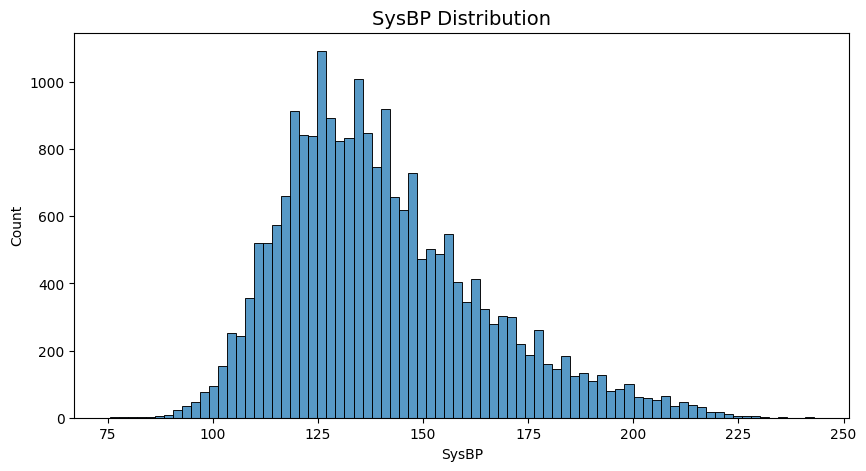

In [29]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Indonesian_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution is righted sweked distribution.
- Systolic blood pressure "SysBP" distribution is almost normal distribution.

In [30]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(Indonesian_df[feature].value_counts())
    print("-----------------")

Gender :
1    12512
2     9581
Name: Gender, dtype: int64
-----------------
Diabetes :
0    15216
1     6877
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    16213
1     5880
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    15640
1     6453
Name: CVD risk, dtype: int64
-----------------


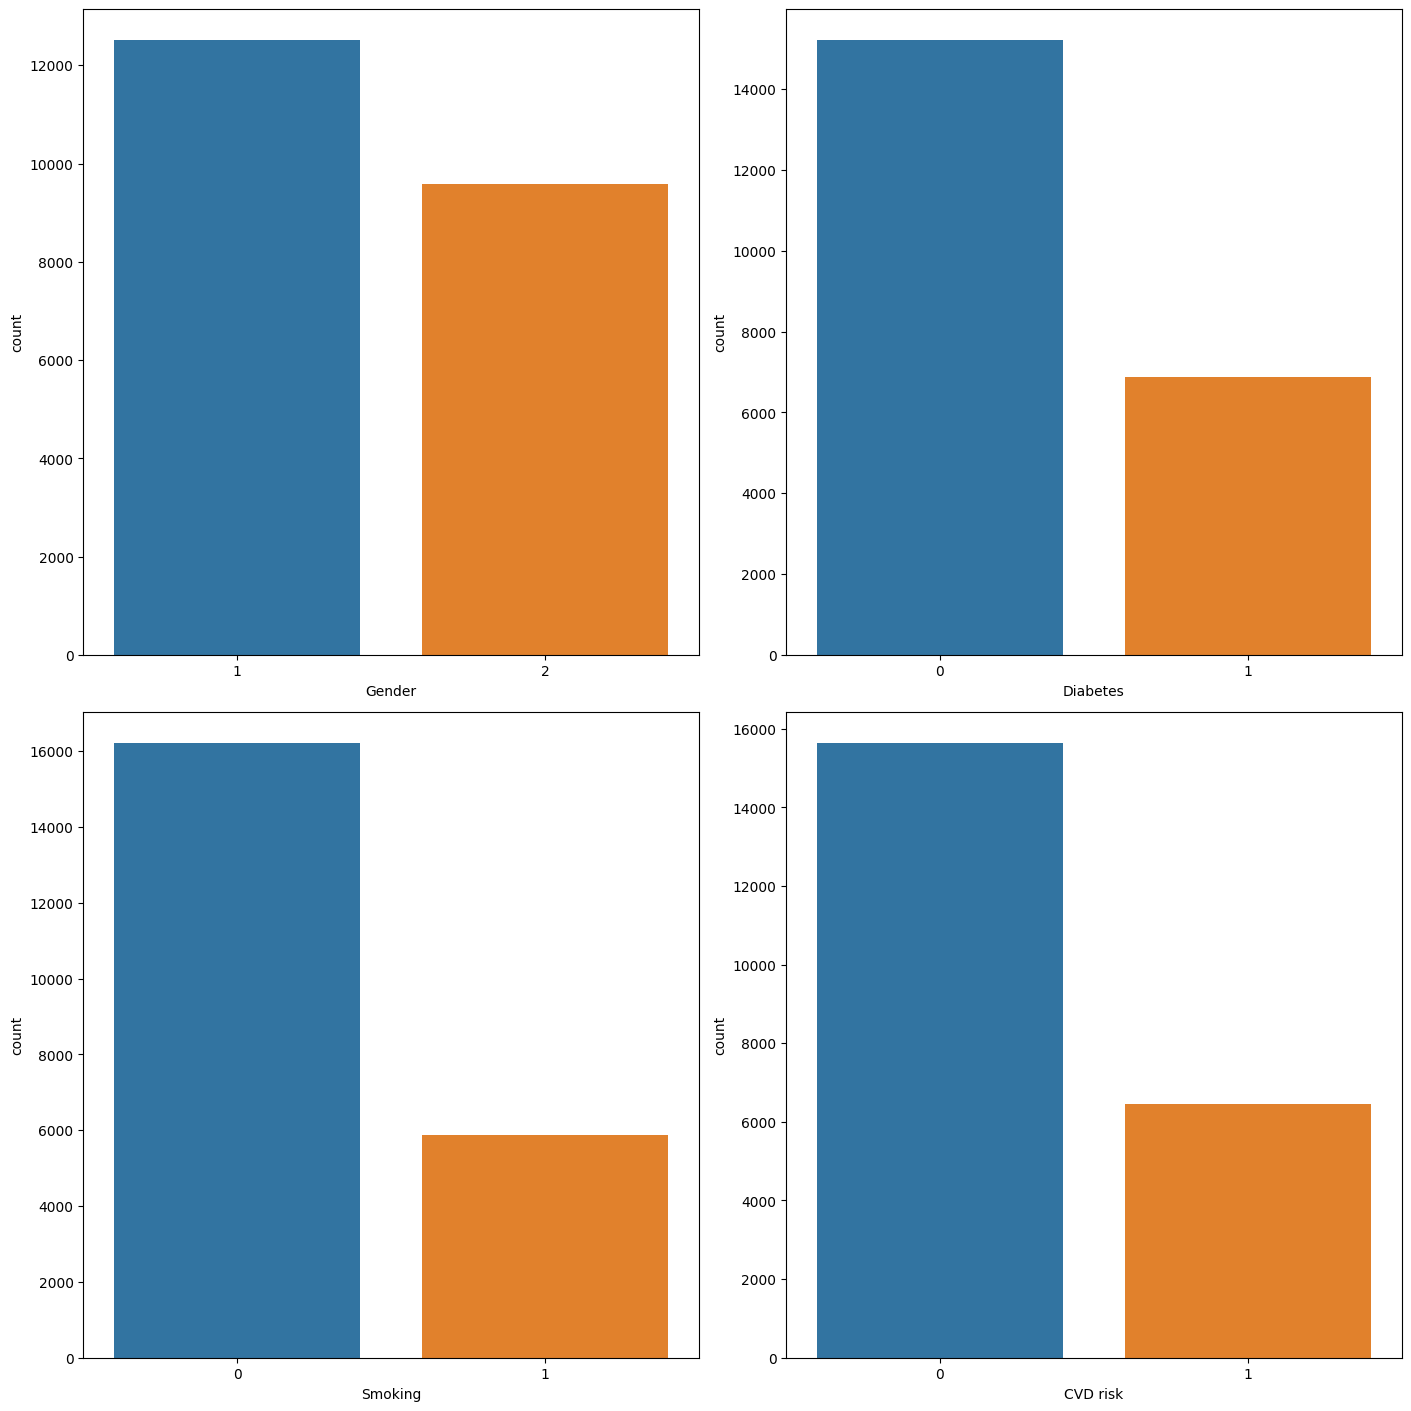

In [31]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Indonesian_df, ax=axs[row][pos])

* There are no signficant imbalance between categorical features in the dataset

### Indian dataset 

In [32]:
# Reading and converting the data into a pandas dataframe
Indian_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Office based Datasets/Indian dataset/cleaned_indian_dataset.csv")

# Informtion about the raw dataset
Indian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562641 entries, 0 to 562640
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  562641 non-null  int64  
 1   glucose     562641 non-null  float64
 2   age         562641 non-null  float64
 3   bpsyst_avg  562641 non-null  float64
 4   female      562641 non-null  float64
 5   currsmoke   562641 non-null  float64
 6   ten_y_cvd   562641 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 30.0 MB


#### Background
This is the data and code for the paper " Geographic and sociodemographic variation of cardiovascular disease risk in India: A crosssectional study of 797,540 adults "

##### Citaion:
1. `@data{DVN/LPTPO6_2018,
author = {Geldsetzer, Pascal},
publisher = {Harvard Dataverse},
title = {{Replication data for ``Geographic and socio-demographic variation of cardiovascular disease risk in India: a cross-sectional study of 800,000 adults''}},
UNF = {UNF:6:7UnU4jaSS1NrCbfeDJnvVg==},
year = {2018},
version = {V2},
doi = {10.7910/DVN/LPTPO6},
url = {https://doi.org/10.7910/DVN/LPTPO6}
}`
2. `@data{DVN/NLU7HI_2020,
author = {Bischops, Anne},
publisher = {Harvard Dataverse},
title = {{Replication Data for:Clustering of cardiovascular disease risk factors at the state, district, community, and household level in India}},
UNF = {UNF:6:k7H89hNeSIFJqTD6L5ME6Q==},
year = {2020},
version = {DRAFT VERSION},
doi = {10.7910/DVN/NLU7HI},
url = {https://doi.org/10.7910/DVN/NLU7HI}
}`
3. `Geldsetzer P, Manne-Goehler J,
Theilmann M, Davies JI, Awasthi A, Danaei G, et al.
(2018) Geographic and sociodemographic
variation of cardiovascular disease risk in India: A
cross-sectional study of 797,540 adults. PLoS Med
15(6): e1002581. https://doi.org/10.1371/journal.
pmed.1002581`
4. `Bischops, A.C., De Neve, JW., Awasthi, A. et al. A cross-sectional study of cardiovascular disease risk clustering at different socio-geographic levels in India. Nat Commun 11, 5891 (2020). https://doi.org/10.1038/s41467-020-19647-3`
5. `Jung, L., De Neve, J. W., Chen, S., Manne-Goehler, J., Jaacks, L. M., Corsi, D. J., ... & Geldsetzer, P. (2019). The interaction between district-level development and individual-level socioeconomic gradients of cardiovascular disease risk factors in India: a cross-sectional study of 2.4 million adults. Social Science & Medicine, 239, 112514.`

In [33]:
# Checking Missing values in the dataset
Indian_df.duplicated().sum()
num_Missing_values_India = Indian_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_India, '\n')

# Checking dupicated values in the dataset
duplicates_India = Indian_df.duplicated().sum()
if duplicates_India:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_India))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure**  |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| CVD risk |**Target label (binary) 1: Presence of CVD (High risk),  0: absence of CVD (Low risk)**|

In [34]:
# define variable columns based on office-based CVD screening strategy

Indian_df = Indian_df.loc[:,['age','female','bpsyst_avg','glucose','currsmoke','ten_y_cvd']]
Indian_df.head()

,age,female,bpsyst_avg,glucose,currsmoke,ten_y_cvd
0,44.0,2.0,144.5,139.0,1.0,0.084521
1,42.0,1.0,120.0,90.0,2.0,0.107591
2,70.0,2.0,143.5,107.0,1.0,0.228246
3,66.0,1.0,132.5,106.0,2.0,0.211493
4,70.0,1.0,155.5,119.0,1.0,0.231731


In [35]:
# Uniforming the columns names
Indian_df.rename({'age': 'Age', 
                              'female': 'Gender',
                              'bpsyst_avg': 'SysBP',
                              'glucose' : 'Diabetes',
                              'currsmoke' : 'Smoking',
                              'ten_y_cvd' : 'CVD risk'}, axis = 1, inplace = True)
Indian_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,44.0,2.0,144.5,139.0,1.0,0.084521
1,42.0,1.0,120.0,90.0,2.0,0.107591
2,70.0,2.0,143.5,107.0,1.0,0.228246
3,66.0,1.0,132.5,106.0,2.0,0.211493
4,70.0,1.0,155.5,119.0,1.0,0.231731
5,45.0,1.0,121.5,134.0,1.0,0.059483
6,51.0,1.0,131.0,89.0,2.0,0.187607
7,55.0,1.0,129.5,96.0,1.0,0.095542
8,56.0,1.0,129.5,145.0,1.0,0.119855
9,50.0,2.0,146.5,104.0,1.0,0.095503


In [36]:
# Uniforming the categories of the categorial variables 
Indian_df['Gender'].replace({ 1.0 : '1', 2.0 : '2'  }, inplace = True)
Indian_df['Smoking'].replace({ 1.0 : '1',  2.0 :'0' }, inplace = True)
Indian_df['Diabetes'] = Indian_df['Diabetes'].apply(lambda x: '1' if x >= 126  else '0')
Indian_df['CVD risk'] = Indian_df['CVD risk'].apply(lambda x: '1' if x >= 0.2  else '0')

Indian_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,44.0,2,144.5,1,1,0
1,42.0,1,120.0,0,0,0
2,70.0,2,143.5,0,1,1
3,66.0,1,132.5,0,0,1
4,70.0,1,155.5,0,1,1
5,45.0,1,121.5,1,1,0
6,51.0,1,131.0,0,0,0
7,55.0,1,129.5,0,1,0
8,56.0,1,129.5,1,1,0
9,50.0,2,146.5,0,1,0


In [37]:
# Defining the coorect types of the variables

Indian_df['Gender'] = Indian_df['Gender'].astype("int64")
Indian_df['Diabetes'] = Indian_df['Diabetes'].astype("int64")
Indian_df['Smoking'] = Indian_df['Smoking'].astype("int64")
Indian_df['CVD risk'] = Indian_df['CVD risk'].astype("int64")

Indian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562641 entries, 0 to 562640
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       562641 non-null  float64
 1   Gender    562641 non-null  int64  
 2   SysBP     562641 non-null  float64
 3   Diabetes  562641 non-null  int64  
 4   Smoking   562641 non-null  int64  
 5   CVD risk  562641 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 25.8 MB


In [38]:
# Checking the brief statistical properities of the numerical variables in the dataset
Indian_df[numeric_features].describe()

,Age,SysBP
count,562641.000000,562641.000000
mean,53.683749,131.095995
std,10.263139,22.002704
min,40.000000,70.000000
25%,45.000000,116.500000
50%,52.000000,128.500000
75%,60.000000,142.500000
max,80.000000,240.000000


#### Observations

- Age has normal range between 40 to 80 years.
- Also, Systolic blood pressure "SysBP" has normal range between 70 to 240 mmHg

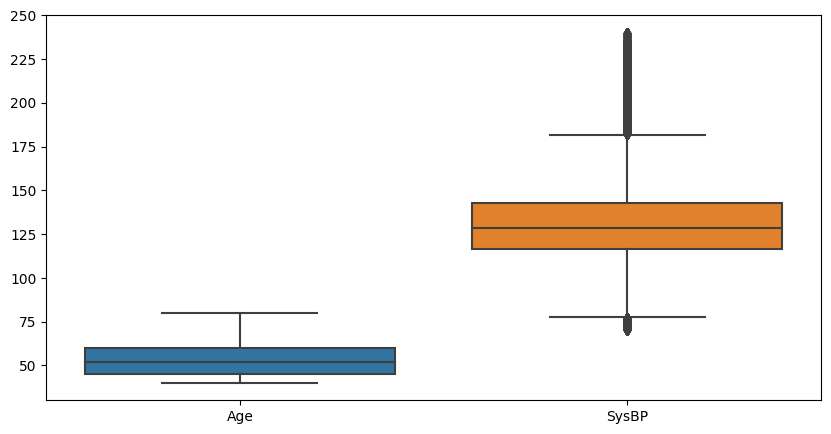

In [39]:
# Plotting the numerical variables in  the dataset

plt.figure(figsize=(10,5), facecolor='w')
sns.boxplot(data=Indian_df[numeric_features])
plt.show()

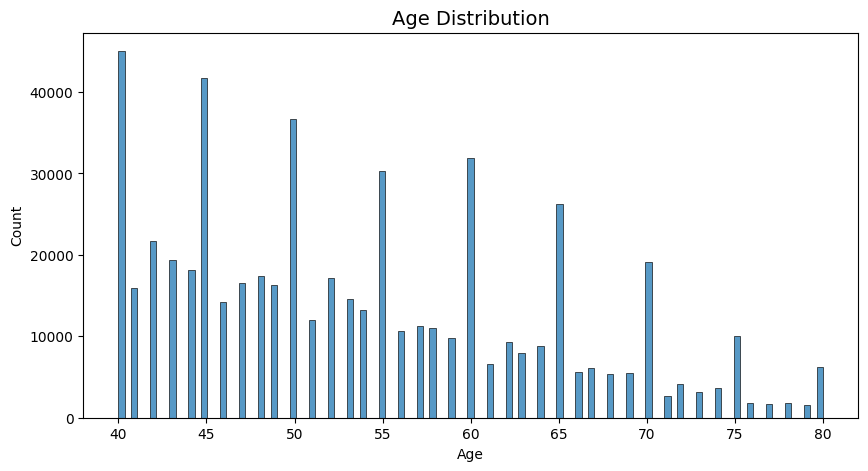

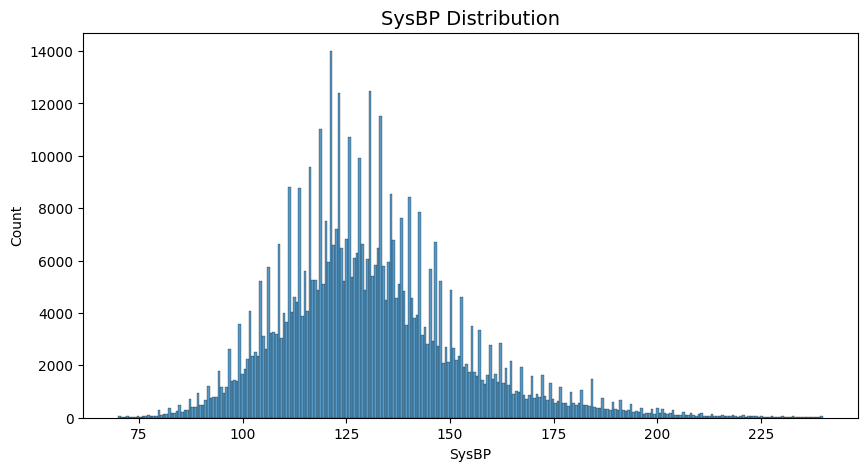

In [40]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Indian_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution has uneven distribution.
- However, Systolic blood pressure "SysBP" distribution is almost normal distribution.

In [41]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(Indian_df[feature].value_counts())
    print("-----------------")

Gender :
2    287713
1    274928
Name: Gender, dtype: int64
-----------------
Diabetes :
0    443695
1    118946
Name: Diabetes, dtype: int64
-----------------
Smoking :
1    476878
0     85763
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    475412
1     87229
Name: CVD risk, dtype: int64
-----------------


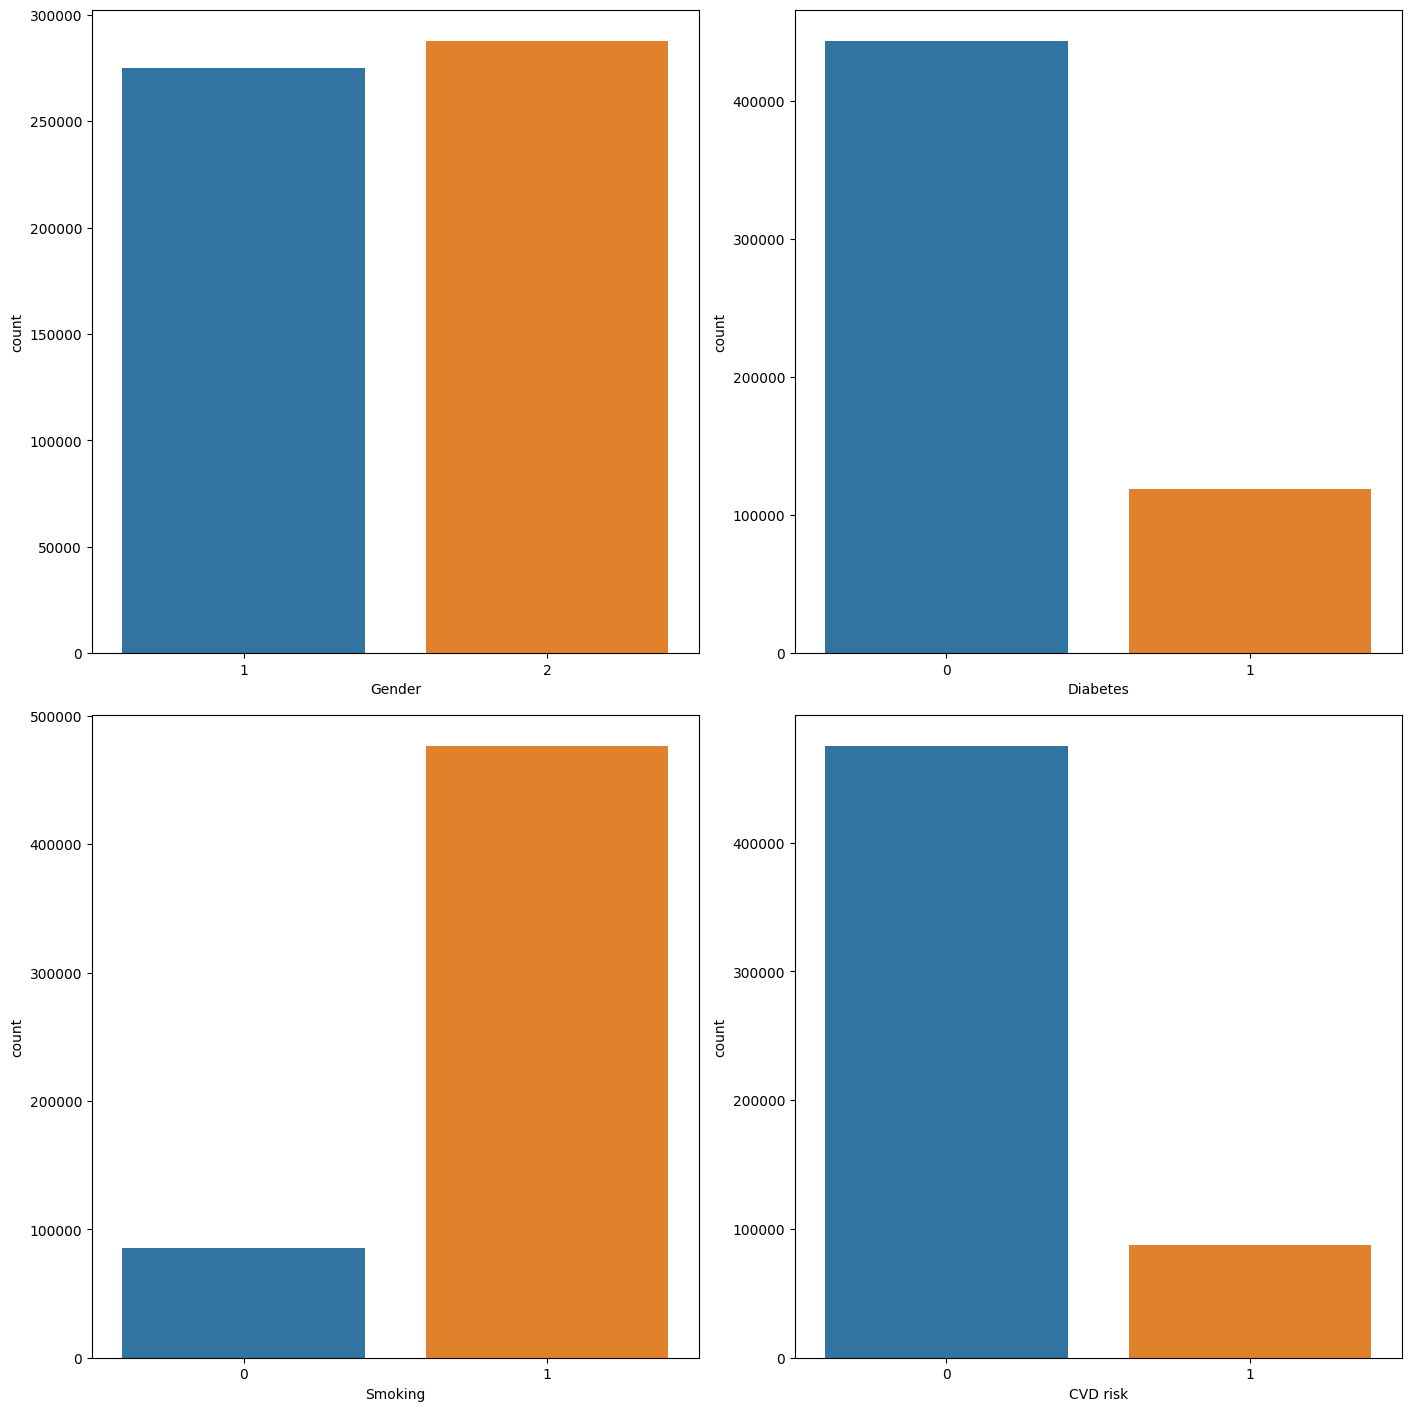

In [42]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Indian_df, ax=axs[row][pos])

* There are no signficant imbalance between categorical features in the dataset

## Combined Office_based dataset 

In [43]:
# concatenation of dataframes

office_df = pd.concat([Kaggle_df_filtered,Indonesian_df, Indian_df], axis = 0,  ignore_index=True)

office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654506 entries, 0 to 654505
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       654506 non-null  float64
 1   Gender    654506 non-null  int64  
 2   SysBP     654506 non-null  float64
 3   Diabetes  654506 non-null  int64  
 4   Smoking   654506 non-null  int64  
 5   CVD risk  654506 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 30.0 MB


In [44]:
# Checking Missing values in the dataset
num_Missing_values_office = office_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_office, '\n')

# Checking dupicated values in the dataset
duplicates_office = office_df.duplicated().sum()
if duplicates_office:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_office))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Duplicates Rows in Dataset are : 572129


In [45]:
# Defining the coorect types of the variables

#office_df['Age'] = office_df['Age'].astype("float")
#office_df['SysBP'] = office_df['SysBP'].astype("float")
#office_df['Gender'] = office_df['Gender'].astype("category")
#office_df['Diabetes'] = office_df['Diabetes'].astype("category")
#office_df['Smoking'] = office_df['Smoking'].astype("category")
#office_df['CVD risk'] = office_df['CVD risk'].astype("category")

office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654506 entries, 0 to 654505
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       654506 non-null  float64
 1   Gender    654506 non-null  int64  
 2   SysBP     654506 non-null  float64
 3   Diabetes  654506 non-null  int64  
 4   Smoking   654506 non-null  int64  
 5   CVD risk  654506 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 30.0 MB


In [46]:
office_df.head(20)

,Age,Gender,SysBP,Diabetes,Smoking,CVD risk
0,50.4,2,110.0,0,0,0
1,55.4,1,140.0,0,0,1
2,51.7,1,130.0,0,0,1
3,48.3,2,150.0,0,0,1
4,47.9,1,100.0,0,0,0
5,60.0,1,120.0,1,0,0
6,60.6,1,130.0,0,0,0
7,61.9,2,130.0,1,0,1
8,48.4,1,110.0,0,0,0
9,54.3,1,110.0,0,0,0


In [47]:
# Checking the brief statistical properities of the numerical variables in the dataset
office_df[numeric_features].describe()

,Age,SysBP
count,654506.000000,654506.000000
mean,53.688822,130.972719
std,9.970422,21.702732
min,29.600000,60.000000
25%,45.000000,117.500000
50%,52.000000,128.000000
75%,60.000000,142.000000
max,116.000000,243.000000


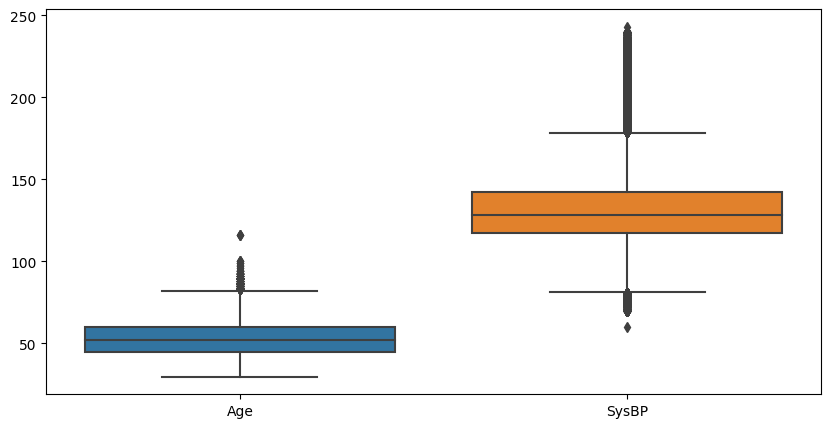

In [48]:
# Plotting the numerical variables in  the dataset

plt.figure(figsize=(10,5), facecolor='w')
sns.boxplot(data=office_df[numeric_features])
plt.show()

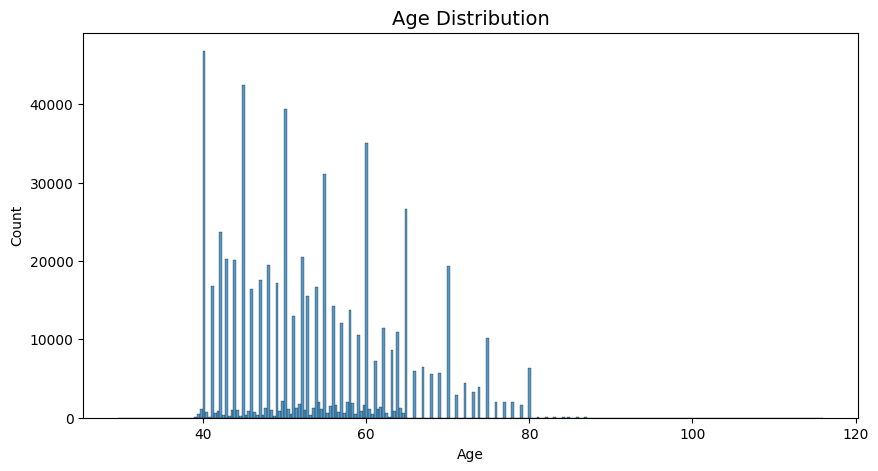

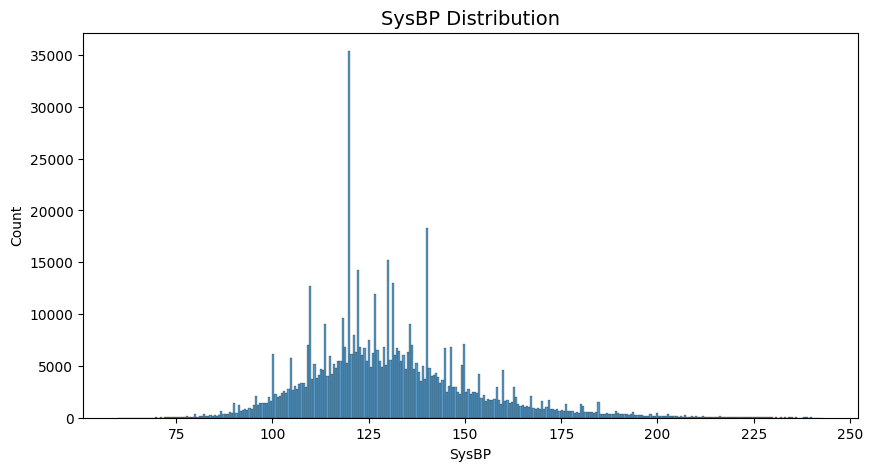

In [49]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(office_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution has uneven distribution.
- However, Systolic blood pressure "SysBP" distribution is almost normal distribution.

In [50]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(office_df[feature].value_counts())
    print("-----------------")

Gender :
1    332820
2    321686
Name: Gender, dtype: int64
-----------------
Diabetes :
0    518190
1    136316
Name: Diabetes, dtype: int64
-----------------
Smoking :
1    488918
0    165588
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    525964
1    128542
Name: CVD risk, dtype: int64
-----------------


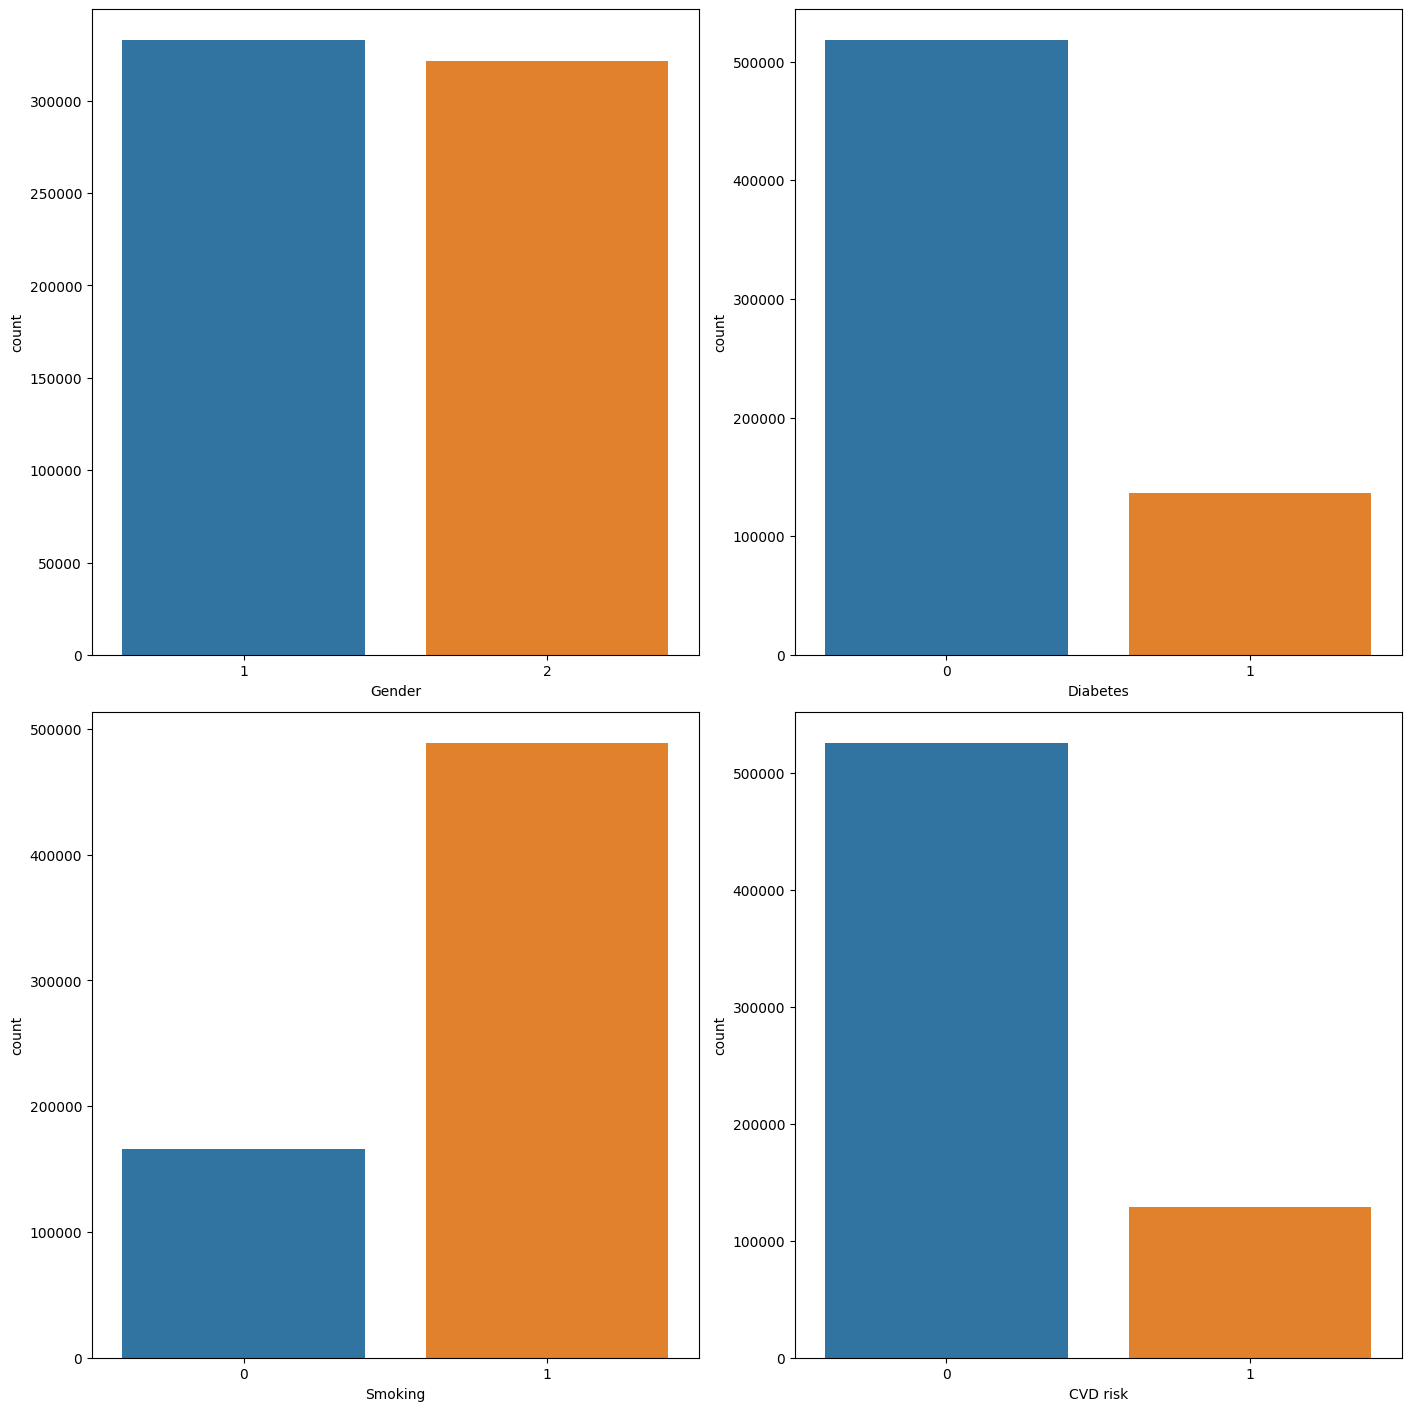

In [51]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=office_df, ax=axs[row][pos])

In [52]:
office_df_compact = office_df.drop_duplicates()

In [53]:
office_df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82377 entries, 0 to 654476
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       82377 non-null  float64
 1   Gender    82377 non-null  int64  
 2   SysBP     82377 non-null  float64
 3   Diabetes  82377 non-null  int64  
 4   Smoking   82377 non-null  int64  
 5   CVD risk  82377 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 4.4 MB


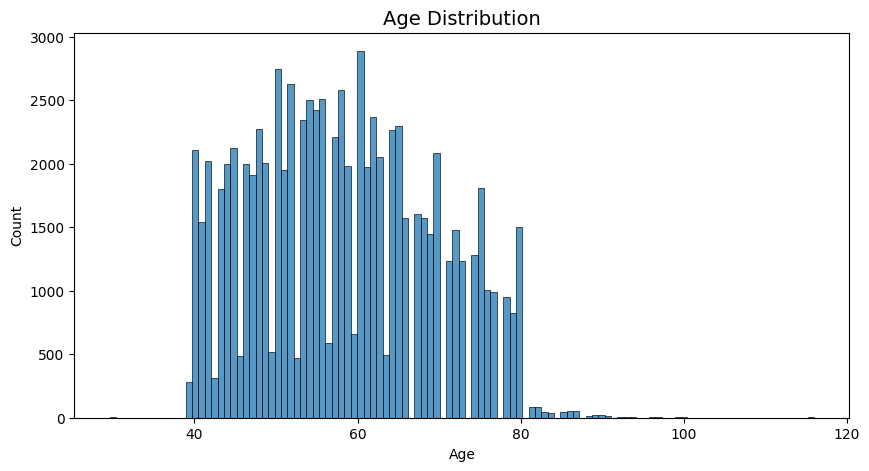

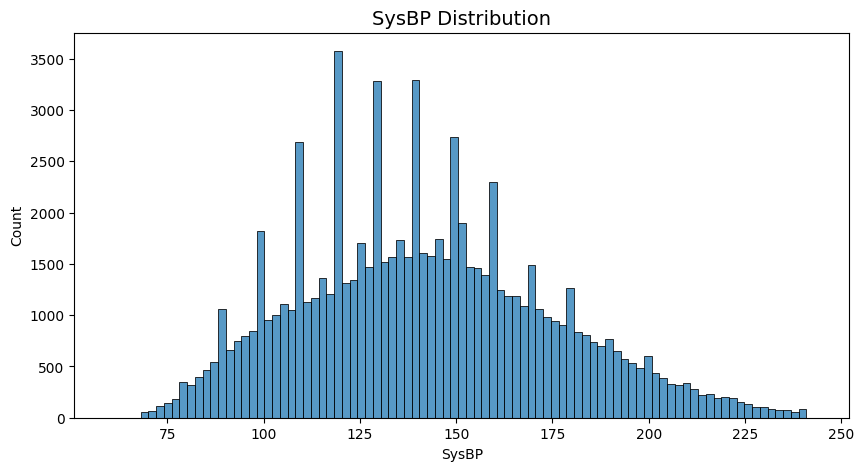

In [54]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(office_df_compact[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

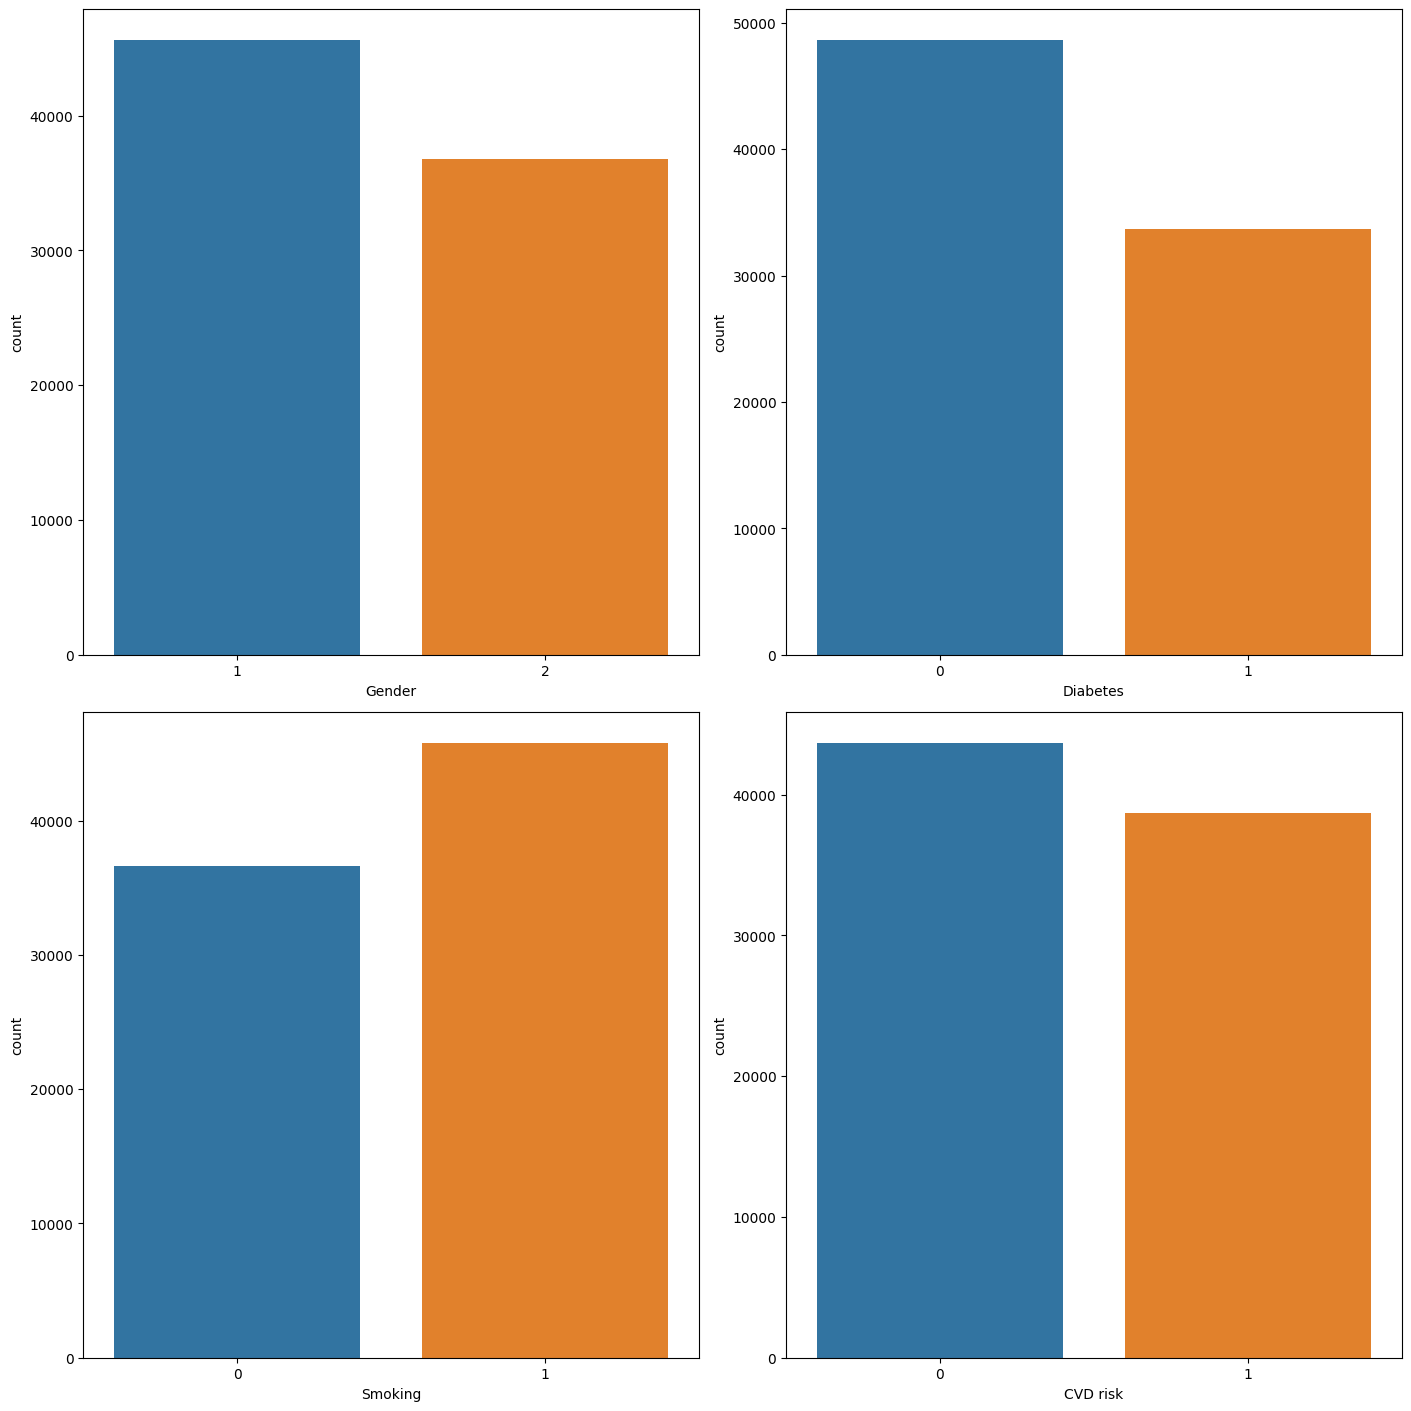

In [55]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=office_df_compact, ax=axs[row][pos])

## Conclusion

**Removal of the duplicates from the dataset result in 82430 cases with more normal distribution for the numerical variables and more balanced classes for the categorical varbiables and target label**

In [56]:
office_df.to_csv('office_based_dataset.csv')

In [57]:
office_df_compact.to_csv('office_based_dataset_compact.csv')

#### *Exploratory Data analysis will be applied in the next notebook*